In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='ballmdr', api_key='oSgf6vHed7evuaiXDdBb')

import fxcmpy
con = fxcmpy.fxcmpy(config_file = '/Users/ballmdr/blockchain-python/FXCM/fxcm.cfg')

In [7]:
symbol = 'EUR/USD'
df = con.get_candles(symbol, period='D1', number=1000)
df['Open'] = (df['bidopen'] + df['askopen']) / 2
df['High'] = (df['bidhigh'] + df['askhigh']) / 2
df['Low'] = (df['bidlow'] + df['asklow']) / 2
df['Close'] = (df['bidclose'] + df['askclose']) / 2
df['Volume'] = df['tickqty']
df.drop(['bidopen', 'askopen', 'bidhigh', 'askhigh', 'bidlow', 'asklow', 'bidclose', 'askclose', 'tickqty'],axis=1, inplace=True)

In [8]:
df.head()

,Open,High,Low,Close,Volume
date,,,,,
2015-11-24 22:00:00,1.063640,1.067345,1.061960,1.064300,251992
2015-11-25 22:00:00,1.064300,1.068935,1.056590,1.062470,293052
2015-11-26 22:00:00,1.062470,1.062755,1.060000,1.061055,159999
2015-11-27 22:00:00,1.061055,1.063805,1.056845,1.059505,191086
2015-11-29 22:00:00,1.059505,1.059520,1.058735,1.058995,560


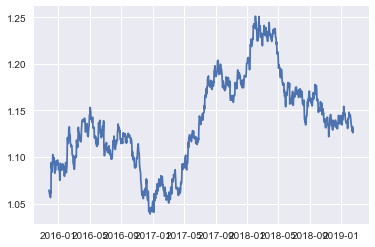

In [20]:
plt.plot(df['Close'])

In [21]:
df['Volume Ratio'] = df['Volume'] / df['Volume'].rolling(20).mean()

In [22]:
df.head()

,Open,High,Low,Close,Volume,Volume Ratio
date,,,,,,
2015-11-24 22:00:00,1.063640,1.067345,1.061960,1.064300,251992,NaN
2015-11-25 22:00:00,1.064300,1.068935,1.056590,1.062470,293052,NaN
2015-11-26 22:00:00,1.062470,1.062755,1.060000,1.061055,159999,NaN
2015-11-27 22:00:00,1.061055,1.063805,1.056845,1.059505,191086,NaN
2015-11-29 22:00:00,1.059505,1.059520,1.058735,1.058995,560,NaN


In [24]:
df.dropna(inplace=True)

In [25]:
df.head()

,Open,High,Low,Close,Volume,Volume Ratio
date,,,,,,
2015-12-16 22:00:00,1.093010,1.101210,1.088770,1.091150,427960,1.633846
2015-12-17 22:00:00,1.091150,1.091505,1.080265,1.082585,310945,1.173901
2015-12-18 22:00:00,1.082585,1.087460,1.080490,1.086845,334229,1.252072
2015-12-20 22:00:00,1.086845,1.087195,1.085240,1.085595,377,0.001456
2015-12-21 22:00:00,1.085595,1.093925,1.084760,1.091475,238752,0.913559


In [32]:
import talib
from talib import MA_Type

In [35]:
upper, middle, lower = talib.BBANDS(df['Close'], matype=MA_Type.T3)

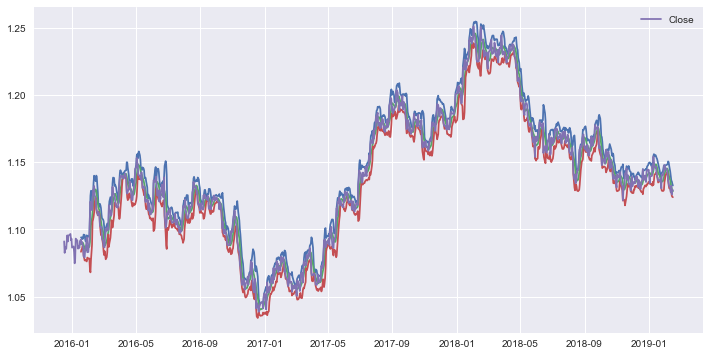

In [36]:
plt.figure(figsize=(12,6))
plt.plot(upper)
plt.plot(middle)
plt.plot(lower)
plt.plot(df['Close'])
plt.legend()
plt.show()

In [65]:
df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=20)
df['Range Ratio'] = (df['High'] - df['Low']) / df['ATR']

In [66]:
df.dropna(inplace=True)

In [67]:
df.head()

,Open,High,Low,Close,Volume,Volume Ratio,ATR,Range Ratio
date,,,,,,,,
2016-01-28 22:00:00,1.089270,1.096770,1.086970,1.094050,281764,1.069145,0.008639,1.134456
2016-01-29 22:00:00,1.094050,1.094865,1.080990,1.083105,385153,1.435097,0.008900,1.558932
2016-01-31 22:00:00,1.083105,1.083725,1.082575,1.083270,692,0.002756,0.008513,0.135091
2016-02-01 22:00:00,1.083270,1.091280,1.081495,1.088745,234303,0.957340,0.008576,1.140919
2016-02-02 22:00:00,1.088745,1.093995,1.088410,1.091925,233081,0.909116,0.008427,0.662763


In [68]:
split = int(len(df) * 0.60)
split

568

In [69]:
X = df.iloc[:split]
y = df.iloc[split:]

In [70]:
from sklearn.cluster import KMeans

In [71]:
kmeans = KMeans(n_clusters=3).fit(X)

In [72]:
y_kmeans_train = kmeans.predict(X)

In [78]:
X.shape

(568, 8)

In [77]:
y_kmeans_train.shape

(568,)

In [81]:
centers = kmeans.cluster_centers_

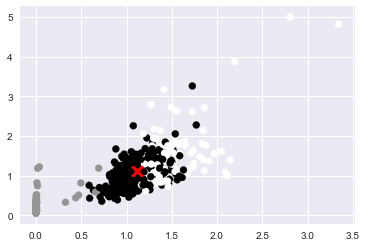

In [82]:
plt.scatter(X['Volume Ratio'], X['Range Ratio'], c=y_kmeans_train)
plt.scatter(centers[:,0],centers[:,1],c='red',s=100,marker='x')